# <center>Brain Tumor Classification MRI using CNN


<center>Deyna Baeva | Student nr: 3595234 



Minor: AI for Society

<br>

Link to the Google Colab Notebook: https://colab.research.google.com/drive/1_FceSbHY9pamYPKnmmhf-qAi3Reftadd?usp=sharing


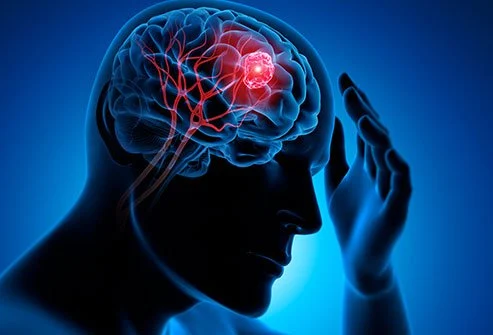

## Introduction
>A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. <br>
Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.<br>
<br>Application of automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

<br>

## Project Goal
>The goal of the project is to build an automatic classifier that takes MRI scans of the brain as input and classifies these scans into more than 4 categories, including: no tumor, glioma, meningioma, and pituitary tumor. 
Brain tumors are complex. There are many abnormalities in the size and location of brain tumors. This makes it difficult to fully understand the nature of the tumor. Additionally, MRI analysis requires a specialized neurosurgeon. In developing countries, a lack of experienced physicians and poor understanding of tumors often make generating reports from MRI difficult and time-consuming. Therefore, automated systems can solve this problem.

<br>

## Description of the Brain Tumor Dataset

> The <a href="https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri">dataset</a> has been taken from the <a>Kaggle.com</a> website.

> The data is organized in two folders - Training and Testing, each containing 4 subcategories.<br>
>>**1. Training set**<br>
    - Glioma tumor (826 images)<br>
    - Meningioma tumor (822 images)<br>
    - No tumor (395 images)<br>
     - Pituitary tumor (827 images)<br><br>
**2. Testing set**<br>
    - Glioma tumor (100 images)<br>
    - Meningioma tumor (115 images)<br>
    - No tumor (105 images)<br>
    - Pituitary tumor (74 images)<br>


Reference: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

<br>


# Preliminary Data Exploration

### Importing the necessary packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from IPython.display import display, clear_output
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import Image
from IPython.core.display import HTML 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


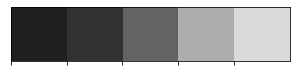

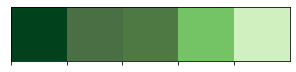

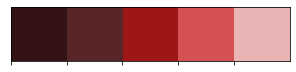

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [ ]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 224

for i in labels:
    folderPath = os.path.join('./drive/MyDrive/dataset/Training', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('./drive/MyDrive/dataset/Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

100%|██████████| 74/74 [00:12<00:00,  5.97it/s]


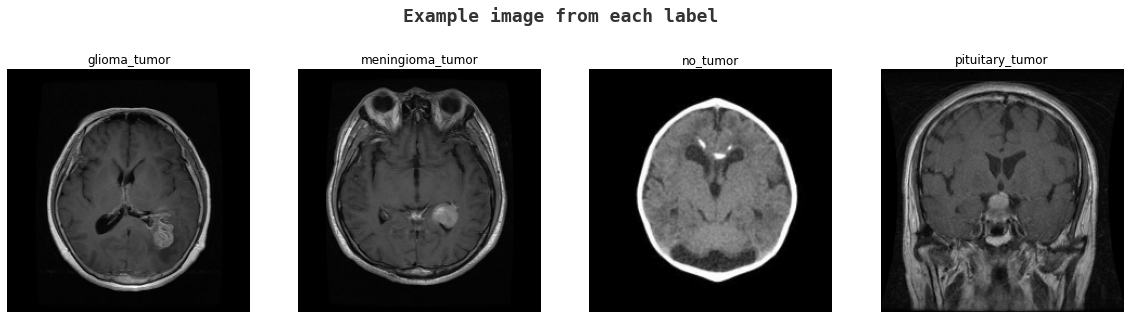

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Example image from each label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=14)

In [ ]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (2870, 224, 224, 3)
x_test shape (394, 224, 224, 3)
y_train shape (2870,)
y_test shape (394,)


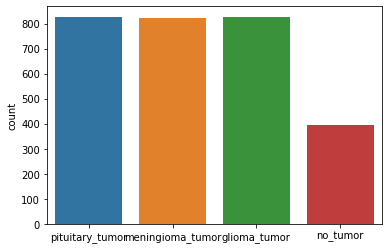

In [ ]:
sns.countplot(y_train)

More samples of tumors and less of no_tumor

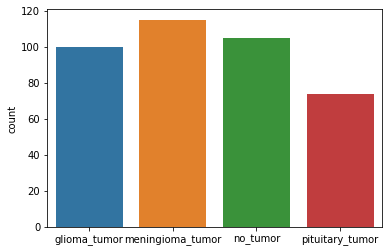

In [ ]:
sns.countplot(y_test)

The majority of the samples are spread evenly, however, there are less samples of pituitary tumor.

In [ ]:
y_train_num = []
for i in y_train:
    y_train_num.append(labels.index(i))
y_train=y_train_num
y_train=tf.keras.utils.to_categorical(y_train)

y_test_num = []
for i in y_test:
    y_test_num.append(labels.index(i))
y_test=y_test_num
y_test=tf.keras.utils.to_categorical(y_test)

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.1,random_state=14)

### Normalize the data

To make model training less sensitive to the scale of features. This allows the model to converge to better weights and, in turn, leads to a more accurate model. Here I am dividing the data by 255 because:

The pixel values can range from 0 to 255 and each number represents a color code. When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex. To reduce this we can normalize the values to range from 0 to 1. In this way, the numbers will be small and the computation becomes easier and faster. As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1. Or another alternative is to use __preprocessing.normalize()__. 


Reference: https://www.educative.io/edpresso/data-normalization-in-python, https://devskrol.com/2021/02/20/a-tip-a-day-python-tip-8-normalize-image-pixel-values-or-divide-by-255/#:~:text=To%20reduce%20this%20we%20can,range%20from%200%20to%201.

In [ ]:
X_train = np.array(X_train) / 255.
X_val = np.array(X_val) / 255.
X_test = np.array(X_test) / 255.

## Data Augmentation

To prevent the problem of overfitting, we can artificially enlarge the dataset. I can increase the size of the current dataset. The idea is to alter the training data with small transformations to reproduce the variations. Data augmentation strategies are methods for changing the array representation while keeping the label the same while altering the training data. Grayscales, horizontal and vertical flips, random crops, color jitters, translations, rotations, and many other augmentations are popular. I can easily double or increase the number of training examples by applying only a couple of these changes to the training data.

Reference: https://www.geeksforgeeks.org/python-data-augmentation/

In [ ]:
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range=0.3,  #radandomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

data_generator.fit(X_train)

Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
# os.mkdir('preview')
x = X_train[0]  
x = x.reshape((1,) + x.shape) 

i = 0
for batch in data_generator.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break 

Visualizing data augmented images

Reference: https://gac6.medium.com/visualizing-data-augmentations-from-keras-image-data-generator-44f040aa4c9f

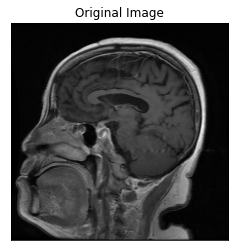

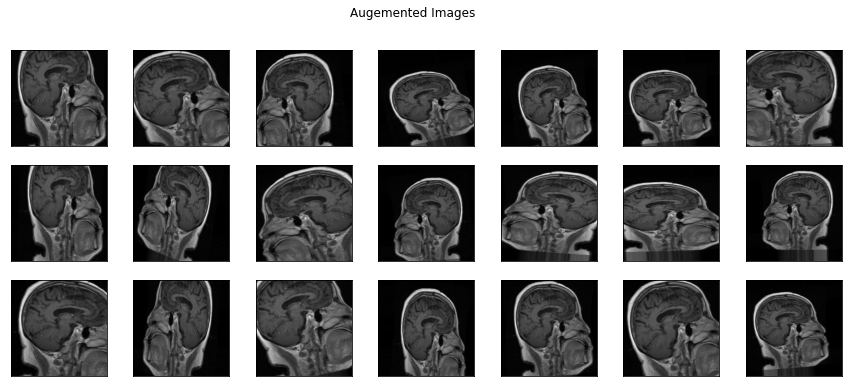

In [ ]:
plt.imshow(X_train[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

<a id=section12></a>

## Detail of model implementation
### CNN approach

In [ ]:
#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization, Concatenate
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, ReduceLROnPlateau

In [ ]:
# Sequential means we're going one layer to the next
model_cnn = Sequential()

# creating 64 windows, it's 3 by 3px
model_cnn.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3))) 
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(64, (3, 3))) 
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2))) 
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.35))

model_cnn.add(Conv2D(64, (3, 3), padding='same'))
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization()) 

model_cnn.add(Conv2D(64, (3, 3)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2))) 
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.35)) 

model_cnn.add(Conv2D(64, (3, 3), padding='same')) 
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())

model_cnn.add(Flatten()) #put it in 1 dimention array
model_cnn.add(Dropout(0.5)) 
model_cnn.add(Dense(512)) 
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(4)) 
model_cnn.add(Activation('softmax'))

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                      

#### After reading an article, it is recommended to visualize the model that I am creating for better understanding it. 
There are three reasons for creating a visual shape of the model: 
1. __Confirm layer order__: The graph plot can help you confirm that the model is connected the way you intended. 
2. __Confirm the output shape of each layer__: It is common to have problems when defining the shape of input data for complex networks like convolutional and recurrent neural networks. The summary and plot can help confirm the input shape to the network is as it was intended.
3. __Confirm parameters__: Some network configurations can use far fewer parameters, such as the use of a TimeDistributed wrapped Dense layer in an Encoder-Decoder recurrent neural network. Reviewing the summary can help spot cases of using far more parameters than expected.

Reference: https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/ 

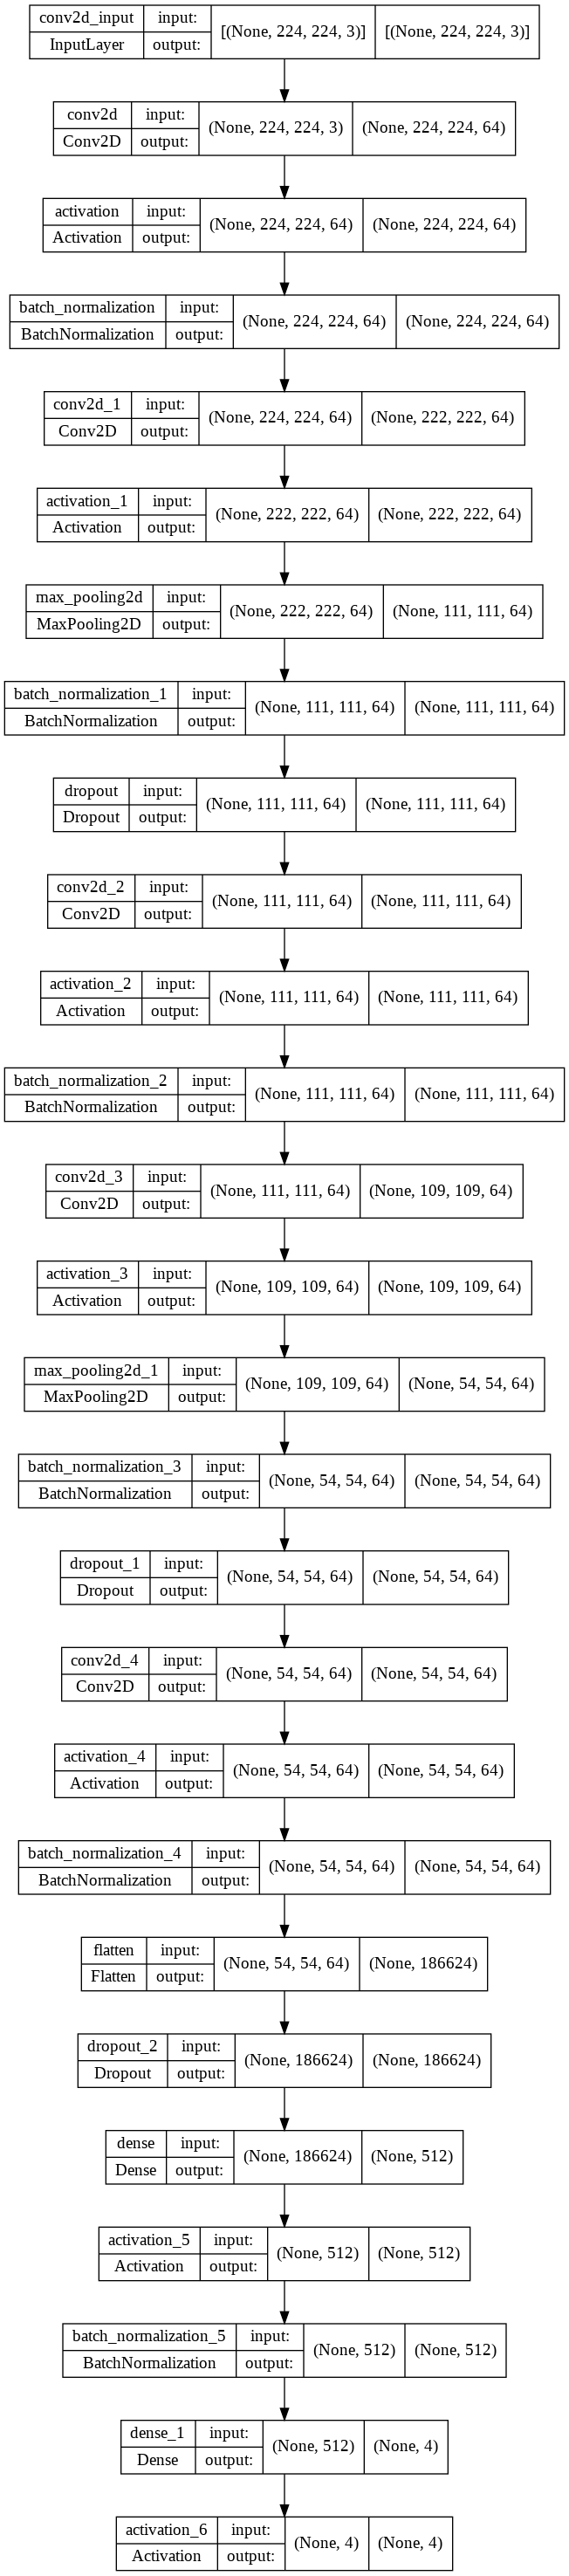

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_cnn, to_file='model_cnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_cnn.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
history = model_cnn.fit(X_train, y_train,validation_split=0.1, verbose=1, batch_size = 32, validation_data = (X_val, y_val),
                     epochs = 20, callbacks =[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
73/73 [==============================] - ETA: 0s - loss: 0.9957 - accuracy: 0.6962 
Epoch 1: val_accuracy improved from -inf to 0.37066, saving model to effnet.h5
73/73 [==============================] - 1430s 20s/step - loss: 0.9957 - accuracy: 0.6962 - val_loss: 3.1073 - val_accuracy: 0.3707 - lr: 0.0010
Epoch 2/20
73/73 [==============================] - ETA: 0s - loss: 0.4624 - accuracy: 0.8330 
Epoch 2: val_accuracy did not improve from 0.37066
73/73 [==============================] - 1435s 20s/step - loss: 0.4624 - accuracy: 0.8330 - val_loss: 1.8677 - val_accuracy: 0.1776 - lr: 0.0010
Epoch 3/20
73/73 [==============================] - ETA: 0s - loss: 0.4287 - accuracy: 0.8378 
Epoch 3: val_accuracy did not improve from 0.37066

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
73/73 [==============================] - 1410s 19s/step - loss: 0.4287 - accuracy: 0.8378 - val_loss: 8.5710 - val_accuracy: 0.3012 - lr: 0.0010
Epoch 4/20
73/73 [====

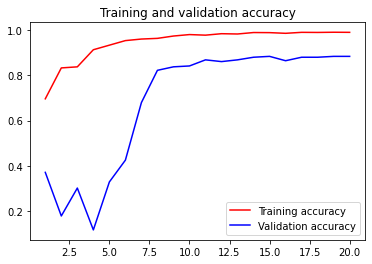

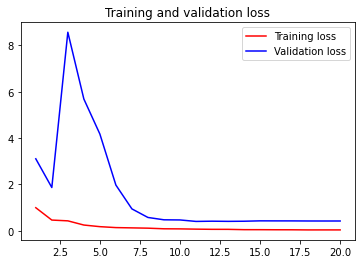

In [ ]:
model_cnn.save('cnn_model.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

At times, the validation loss is greater than the training loss. This may indicate that the model is underfitting. Underfitting occurs when the model is unable to accurately model the training data, and hence generates large errors.

Furthermore, the results in scenario 1 and 2 indicate that further training is needed to reduce the loss incurred during training. Alternatively, we can also increase the training data either by obtaining more samples or augmenting the data.

Reference: https://www.baeldung.com/cs/training-validation-loss-deep-learning 

In [ ]:
train_pred = model_cnn.predict(X_train)
train_pred = np.argmax(train_pred, axis=1)
Y_train_ = np.argmax(y_train, axis=1)
print("Accuracy on training set: {:.2f}%".format(np.sum(train_pred==Y_train_)/len(Y_train_)*100))

Accuracy on training set: 98.61%


In [ ]:
pred = model_cnn.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.73      0.19      0.30       100
           1       0.83      0.86      0.85       115
           2       0.55      0.97      0.70       105
           3       0.80      0.69      0.74        74

    accuracy                           0.69       394
   macro avg       0.73      0.68      0.65       394
weighted avg       0.72      0.69      0.65       394



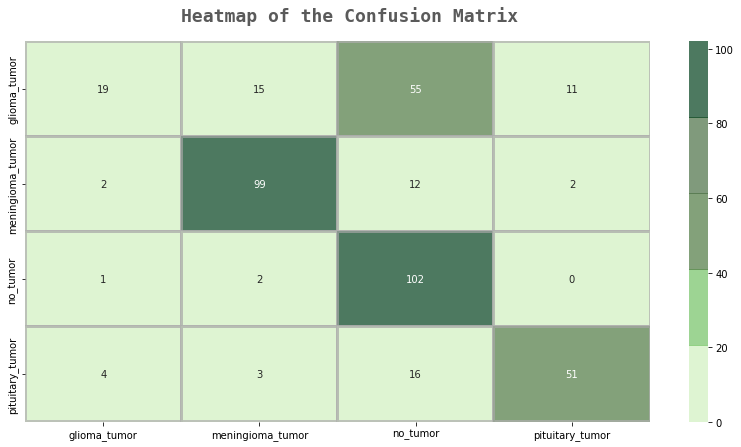

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3], fmt='g')
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

The confusion matrix above, also known as an error matrix, is a summarized table used to assess the performance of a classification model. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

This is a 4x4 matrix. From this we can observe how the model performed.
- 99 samples were classified correctly as meningioma_tumor
- 102 samples were correctly classified as no_tumor
- 51 samples were correctly classified as pituitary_tumor

The rest are misclassified. For instance, 55 samples were classified as no_tumor and it should have been glioma_tumor, same for the rest.

The results of the classification report can also confirm that the model is performing pretty badly. A possible solution would be to train the model more times or remove some layers from the deep learning model.

Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/

In [ ]:
test_pred = model_cnn.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)
Y_test_ = np.argmax(y_test, axis=1)
print("Accuracy on testing set: {:.2f}%".format(np.sum(test_pred==Y_test_)/len(Y_test_)*100))

Accuracy on testing set: 68.78%


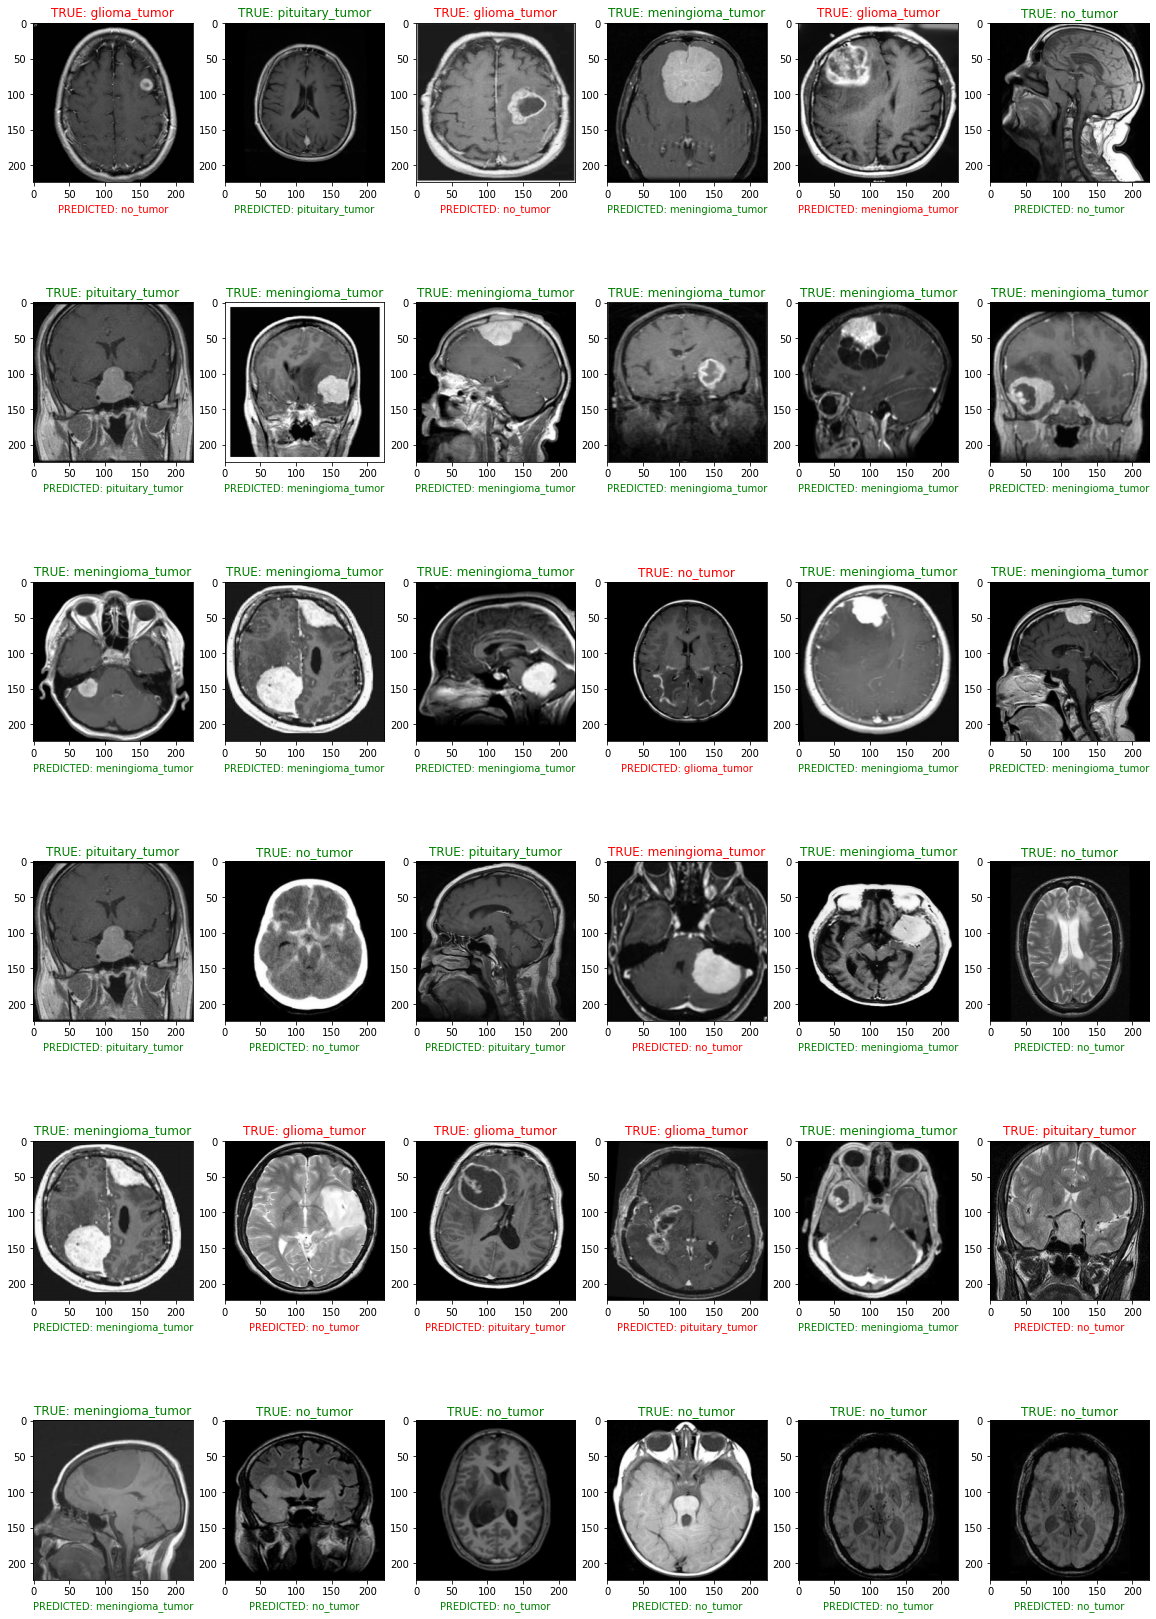

In [ ]:
categories = np.sort(os.listdir('./drive/MyDrive/dataset/Testing'))
size = image_size
fig, ax = plt.subplots(6,6, figsize=(20, 30))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model_cnn.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model_cnn.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model_cnn.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')

Despite the low performance of the model, it successfully classifies 27 correct and 9 incorrect MRI scans from the test data.

# Testing the model using widgets

In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model_cnn.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])

# Conclusion

For this project, I ended up having two notebooks, each with a model application in them. One applies Convolutional Neural Networks (CNN) and one applies EfficientNetBO. I was lucky because my data was already labelled and divided into folders of a brain tumor category, so have not lost any time on this.

The CNN model resulted in having 98.61% accuracy after being trained a few times each training took more than 2 hours. Overall, the model was trained on 2937 MRI samples. During the evaluation of the model, supposedly 98% of the predictions were correct. However, despite the high prediction percentage, after implementing the evaluation metrics, the model showed how poor it performed. The result of the test data was 68.78%. This means that the training data should be increased either by obtaining more samples or augmenting the data. Besides that, further training of the model should be performed to better the outcome of the model.

After completing the training with the CNN model, I decided to use a second model to check if there will be any change in the accuracy, the evaluation and the speed. The EfficientNetBO was used as the architecture delivers high accuracy results while keeping the parameters and mathematical operations as low as possible. The model accomplished 99.63% accuracy. The results achieved with the testing set were 97.55%. With such high accuracy, it was no surprise that there were no photos mistaken during the evaluation on the test set. 

Besides that, I have implemented widgets for EfficientNetBO to test the model on pictures, which are uploaded from my local directory. I can confidently say that after testing it, it predicted all of them correctly. For the CNN model it seemed that the widgets are not working correctly. 

Not to forget is that this notebook is intended to be seen by machine learning engineers. That is why there are bug chuncks of code and it is not meant to be provided to neurosurgeons. An optimal solution on which it has to be worked on in the future is an implementation in the sort of an application or so. 

To conclude, each of the two models has its benefits. Depending on the time and computational consumption I have provided solutions which are flexible and will be useful for smaller or bigger datasets. Each model can be applied according to the available resources which are needed for the performance of the models.


Reference: https://arxiv.org/pdf/1905.11946.pdf, https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html, https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html#:~:text=EfficientNet%20Performance&text=In%20general%2C%20the%20EfficientNet%20models,by%20an%20order%20of%20magnitude. 
